<img src="https://fibvisiona.com/sites/default/files/inline-images/logo-upc.png" height="50%" width="50%"/>  
  
# Machine Learning Techniques for Exoplanet Detection with NASA Kepler Data
<b>Machine Learning Course Final Project </b>  
Authors: <i>Luis Alfredo León Villapún and Chidiebere Ogbuchi</i>  
Supervised by: <i>Prof. Marta Arias Vicente and Prof. Bernat Coma Puig</i>  
* * *

To develop a machine learning model that predicts whether or not an observation is a genuine candidate for an exoplanet. Exoplanets are planets that orbit stars outside of our solar system. Moreover, recent space missions have aimed to find new planets in distant stars. This has proven to be a challenging and demanding process since the methods used to validate them are sometimes indirect. For example, the quantity of light each orbit of the star is considered.  
For this work, however, we use a <a href="https://www.kaggle.com/datasets/arashnic/exoplanets?resource=download">dataset</a> gathered by the Kepler mission that includes attributes such as the planet's mass, radius, and orbital period. We may utilize the properties from this "NASA Exoplanet Dataset" observation to establish whether or not a planet is an exoplanet.

## Requirements
Please execute the cells in this section if needed.

In [1]:
!pip install opendatasets > /dev/null 2>&1 # This is to not display the output
!pip install pandas > /dev/null 2>&1
!pip install matplotlib > /dev/null 2>&1
!pip install ipympl > /dev/null 2>&1
!pip install seaborn > /dev/null 2>&1

In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
rcParams['figure.figsize'] = 6.552, 4.6312

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from collections import defaultdict
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from tabulate import tabulate

import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## Load Dataset

The following cell will try to download the dataset directly from the Google Drive URL from which you have uploaded the dataset. If dataset doesn't exist in your drive, it will ask you to lad from Kaggle. You will need a kaggle API token to be able to do so.

In [3]:
from google.colab import drive
import opendatasets as od
import os
import pandas as pd
import numpy as np

def read_kaggle_dataset(
    kaggle_url, 
    file_name, 
    drive_url="/content/drive/My Drive/ML/sources/exoplanets.csv"):
  
  try:
    drive.mount('/content/drive', force_remount=False)
    df = pd.read_csv(drive_url, header=0, sep=",")
    print("Dataset loaded from Google Drive")
  
  except:
    print("Dataset not found in Google Drive, downloading from Kaggle...")
    od.download(kaggle_url)
    folder_name = kaggle_url.split("/")[-1]
    df = pd.read_csv(os.path.join(folder_name, file_name))
  
  return df

kaggle_url = "https://www.kaggle.com/datasets/arashnic/exoplanets"
file_name = "exoplanets.csv"
exoplanets = read_kaggle_dataset(kaggle_url, file_name)

Mounted at /content/drive
Dataset loaded from Google Drive


## Data Exploration
Let's start first with the data exploration of the dataset. Here, we will take a first look into the dataset, the available features and classes.

In [4]:
exoplanets.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [5]:
exoplanets.head(9).T

,0,1,2,3,4,5,6,7,8
kepid,10797460,10797460,10811496,10848459,10854555,10872983,10872983,10872983,6721123
kepoi_name,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01,K00756.01,K00756.02,K00756.03,K00114.01
kepler_name,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b,Kepler-228 d,Kepler-228 c,Kepler-228 b,NaN
koi_disposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED,CONFIRMED,CONFIRMED,CONFIRMED,FALSE POSITIVE
koi_pdisposition,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE
koi_score,1.0,0.969,0.0,0.0,1.0,1.0,1.0,0.992,0.0
koi_fpflag_nt,0,0,0,0,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0,0,0,0,1
koi_fpflag_co,0,0,0,0,0,0,0,0,1
koi_fpflag_ec,0,0,0,0,0,0,0,0,0


In [6]:
exoplanets.iloc[0,4:8]

koi_pdisposition    CANDIDATE
koi_score                 1.0
koi_fpflag_nt               0
koi_fpflag_ss               0
Name: 0, dtype: object

In [7]:
exoplanets['koi_disposition'].unique()
exoplanets['koi_pdisposition'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

Here, we can see different attributes that we can classify in different categories.  
<b>Identifiers</b>  
First we have identifiers such as  kepid, kepoi_name, kepler_name.  
<b>Target Classes</b>  
This would be koi_disposition and koi_pdisposition. Since the objective of our project is to better determine which planets are candidates, we can use the <i>koi_pdisposition</i> feature as our target class. This makes this problem a binary classification problem.  
<b>Features</b>  
The rest of the columns are clearly features that constitute the dimensions of our problem. Here we can also make some distinctions.
- Flags: The flags are often used to "mark" some rows as false positives. Since we want to avoid bias with our analysis we will discard this columns.
- Errors: These columns contain error values from other columns.

In [8]:
exoplanets.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
kepid,9564.0,NaN,NaN,NaN,7690628.327373,2653459.080974,757450.0,5556034.25,7906892.0,9873066.5,12935144.0
kepoi_name,9564,9564,K00752.01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kepler_name,2359,2359,Kepler-227 b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_disposition,9564,3,FALSE POSITIVE,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_pdisposition,9564,2,FALSE POSITIVE,4847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_score,8054.0,NaN,NaN,NaN,0.480829,0.476928,0.0,0.0,0.334,0.998,1.0
koi_fpflag_nt,9564.0,NaN,NaN,NaN,0.208595,4.76729,0.0,0.0,0.0,0.0,465.0
koi_fpflag_ss,9564.0,NaN,NaN,NaN,0.232748,0.422605,0.0,0.0,0.0,0.0,1.0
koi_fpflag_co,9564.0,NaN,NaN,NaN,0.197512,0.398142,0.0,0.0,0.0,0.0,1.0
koi_fpflag_ec,9564.0,NaN,NaN,NaN,0.120033,0.325018,0.0,0.0,0.0,0.0,1.0


In [9]:
exoplanets.shape

(9564, 49)

In [10]:
exoplanets["koi_disposition"].value_counts()

FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: koi_disposition, dtype: int64

In [11]:
exoplanets["koi_pdisposition"].value_counts()

FALSE POSITIVE    4847
CANDIDATE         4717
Name: koi_pdisposition, dtype: int64

We can observe that we are mainly dealing with numerical data. The only categorical columns are <b>kepoi_name</b>, <b>kepler_name</b>, <b>koi_disposition</b>, and <b>koi_pdisposition</b>. Apparently the <b>koi_pdisposition</b> column can be used as our target variable in the models we create, since it indicates if, given certain characteristics, a planet can be considered or not as a candidate exoplanet.  
It is also to note that the dataset has almost 10k lines, a small dataset, against 49 columns. Depending on the models we decide to try, it might be useful to perform dimensionality reduction on it. Also, since we don't have a lot of rows, we could easily take advantage of compute heavy approaches like SVM and also try cross validation to better approach our error estimation.

 ## Pre-processing
After the initial exploration on the data and dropping features that are not useful due to domain knowledge, or that contained a high percentage of empty values, we are now ready to perform the main preprocessing steps.

### Splitting Data

To prevent data leakage, we split data before applying any transformations,  remove any features that are not available at prediction time, and ensure that sets are independent and representative of the population.

In [12]:
# Split the data into training and test sets
seen_data, unseen_data = train_test_split(exoplanets, test_size=0.2, random_state=42)

### Drop the irrelevant columns
Based on domain knowledge, these features do not provide valuable information, predictive power or insights that are relevant to your modeling task. For more info please refer to the data dictionary referenced on the project report.

In [13]:
#Drop columns
cols = ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname', "koi_tce_plnt_num", 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition', 'koi_score']
seen_data.drop(columns = cols, inplace =True)

### Finding out missing values

<Axes: xlabel='missing', ylabel='col'>

Text(0.5, 1.0, 'Column missing values counts')

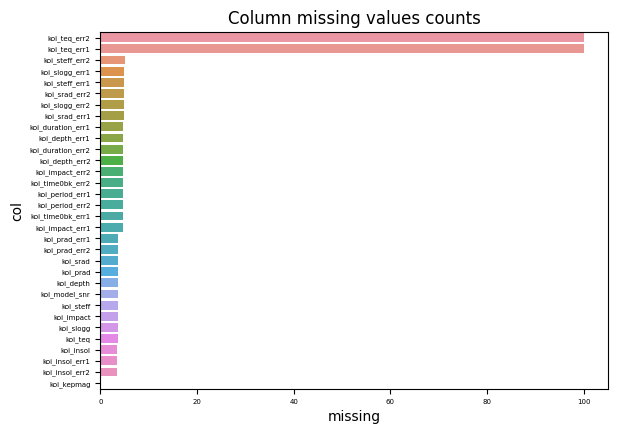

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

missing = []
for col in seen_data.columns:
    missing.append((col, (seen_data[col].isna().sum() / seen_data.shape[0]) * 100))
missing = pd.DataFrame(missing).sort_values(by=[1], ascending=False)
missing.rename(columns={0: 'col', 1: 'missing'}, inplace=True)
missing = missing.loc[missing['missing'] > 0]
sns.barplot(data=missing, x='missing', y='col', orient="h")
plt.title("Column missing values counts")
_ = plt.yticks(fontsize=5)  # Set the fontsize for the y-axis
_ = plt.xticks(fontsize=5)  # Set the fontsize for the x-axis

In [15]:
cols_to_check = [col for col in seen_data.columns if col not in['koi_teq_err1', 'koi_teq_err2']]
seen_data[cols_to_check].isna().sum()

koi_pdisposition       0
koi_period             0
koi_period_err1      358
koi_period_err2      358
koi_time0bk            0
koi_time0bk_err1     358
koi_time0bk_err2     358
koi_impact           287
koi_impact_err1      358
koi_impact_err2      358
koi_duration           0
koi_duration_err1    358
koi_duration_err2    358
koi_depth            287
koi_depth_err1       358
koi_depth_err2       358
koi_prad             287
koi_prad_err1        287
koi_prad_err2        287
koi_teq              287
koi_insol            257
koi_insol_err1       257
koi_insol_err2       257
koi_model_snr        287
koi_steff            287
koi_steff_err1       374
koi_steff_err2       384
koi_slogg            287
koi_slogg_err1       374
koi_slogg_err2       374
koi_srad             287
koi_srad_err1        374
koi_srad_err2        374
ra                     0
dec                    0
koi_kepmag             1
dtype: int64

The distribution of the empty values suggests that the first two columns should be ignored, and it also suggests that for the remaining columns with empty values, their empty distribution is similar. Let's find out if this empty values are shared across observations (row-wise) or not.

<Axes: ylabel='Frequency'>

287

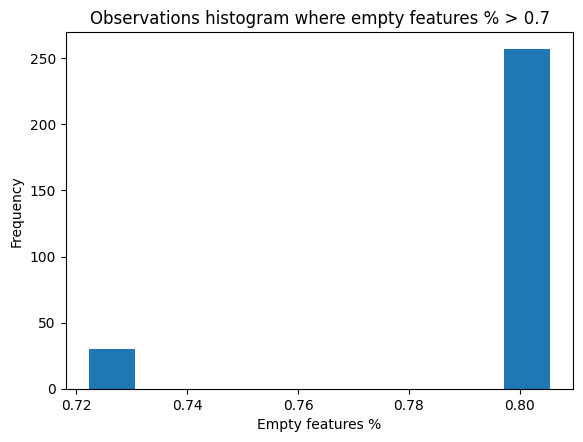

In [16]:
cols_to_check = [col for col in seen_data.columns if col not in['koi_teq_err1', 'koi_teq_err2']]
empty_values_percentage = seen_data[cols_to_check].isna().apply(lambda x: sum([1 for col in x if col is True]) / len(x), axis=1)
empty_values_percentage.where(empty_values_percentage > 0.7).dropna().plot.hist()
_ = plt.title("Observations histogram where empty features % > 0.7")
_ = plt.xlabel("Empty features %")


empty_values_percentage.where(empty_values_percentage > 0.7).dropna().count()

This proves that there are 287 rows where the empty features are higher than 70% of the observation. We can discard these rows as well.

### Dealing with the missing values

Firstly, we drop columns with more than half missing values since inputing them would lead to bias. In this case, we will drop koi_teq_err1 and koi_teq_err2.

In [17]:
#Drop columns with more than half missing values 
seen_data.drop(columns = [i for i in seen_data.columns if (seen_data[i].isna().sum() > seen_data[i].count()/2) == True], inplace = True)

#### Missing values in the continuous variables

The remaining features still contain missing observations which we need to manage. To manage them, we will first drop the rows where the empty values represent more than 70% of the observation. With the remaining empty values, will use a KNNImputer with 5 neighbors.

In [18]:
seen_data.isnull().sum()

koi_pdisposition       0
koi_period             0
koi_period_err1      358
koi_period_err2      358
koi_time0bk            0
koi_time0bk_err1     358
koi_time0bk_err2     358
koi_impact           287
koi_impact_err1      358
koi_impact_err2      358
koi_duration           0
koi_duration_err1    358
koi_duration_err2    358
koi_depth            287
koi_depth_err1       358
koi_depth_err2       358
koi_prad             287
koi_prad_err1        287
koi_prad_err2        287
koi_teq              287
koi_insol            257
koi_insol_err1       257
koi_insol_err2       257
koi_model_snr        287
koi_steff            287
koi_steff_err1       374
koi_steff_err2       384
koi_slogg            287
koi_slogg_err1       374
koi_slogg_err2       374
koi_srad             287
koi_srad_err1        374
koi_srad_err2        374
ra                     0
dec                    0
koi_kepmag             1
dtype: int64

Drop the rows with high percentage of missing features (>70%).

In [19]:
seen_data["empty_values_perc"] = seen_data[cols_to_check].isna().apply(lambda x: sum([1 for col in x if col is True]) / len(x), axis=1)
rows_before = seen_data.shape[0]
to_drop = seen_data["empty_values_perc"].where(seen_data["empty_values_perc"] > 0.7).dropna()
seen_data = seen_data.drop(to_drop.index)
rows_after = seen_data.shape[0]
rows_before-rows_after
seen_data.isna().sum()
seen_data.drop(columns=["empty_values_perc"], inplace=True)

287

koi_pdisposition      0
koi_period            0
koi_period_err1      71
koi_period_err2      71
koi_time0bk           0
koi_time0bk_err1     71
koi_time0bk_err2     71
koi_impact            0
koi_impact_err1      71
koi_impact_err2      71
koi_duration          0
koi_duration_err1    71
koi_duration_err2    71
koi_depth             0
koi_depth_err1       71
koi_depth_err2       71
koi_prad              0
koi_prad_err1         0
koi_prad_err2         0
koi_teq               0
koi_insol             0
koi_insol_err1        0
koi_insol_err2        0
koi_model_snr         0
koi_steff             0
koi_steff_err1       87
koi_steff_err2       97
koi_slogg             0
koi_slogg_err1       87
koi_slogg_err2       87
koi_srad              0
koi_srad_err1        87
koi_srad_err2        87
ra                    0
dec                   0
koi_kepmag            1
empty_values_perc     0
dtype: int64

We will have to decide with experimentation which is the better approach to impute the values, or if it is just better to drop the error features.

Impute the rest of the rows

In [20]:
categorical_vars = ["koi_pdisposition"]
seen_data = seen_data[[col for col in seen_data.columns if "err" not in col]]
numerical_vars = [col for col in seen_data.columns if col not in categorical_vars]
imputer = KNNImputer(n_neighbors=5)
seen_data[numerical_vars] = imputer.fit_transform(seen_data[numerical_vars])
seen_data.isnull().sum()
# seen_data.dropna(inplace=True)
seen_data.shape

koi_pdisposition    0
koi_period          0
koi_time0bk         0
koi_impact          0
koi_duration        0
koi_depth           0
koi_prad            0
koi_teq             0
koi_insol           0
koi_model_snr       0
koi_steff           0
koi_slogg           0
koi_srad            0
ra                  0
dec                 0
koi_kepmag          0
dtype: int64

(7364, 16)

### Removing Outliers

We remove outliers using Z-Scores and the Local Outlier Factor.

In [21]:
seen_data.shape

(7364, 16)

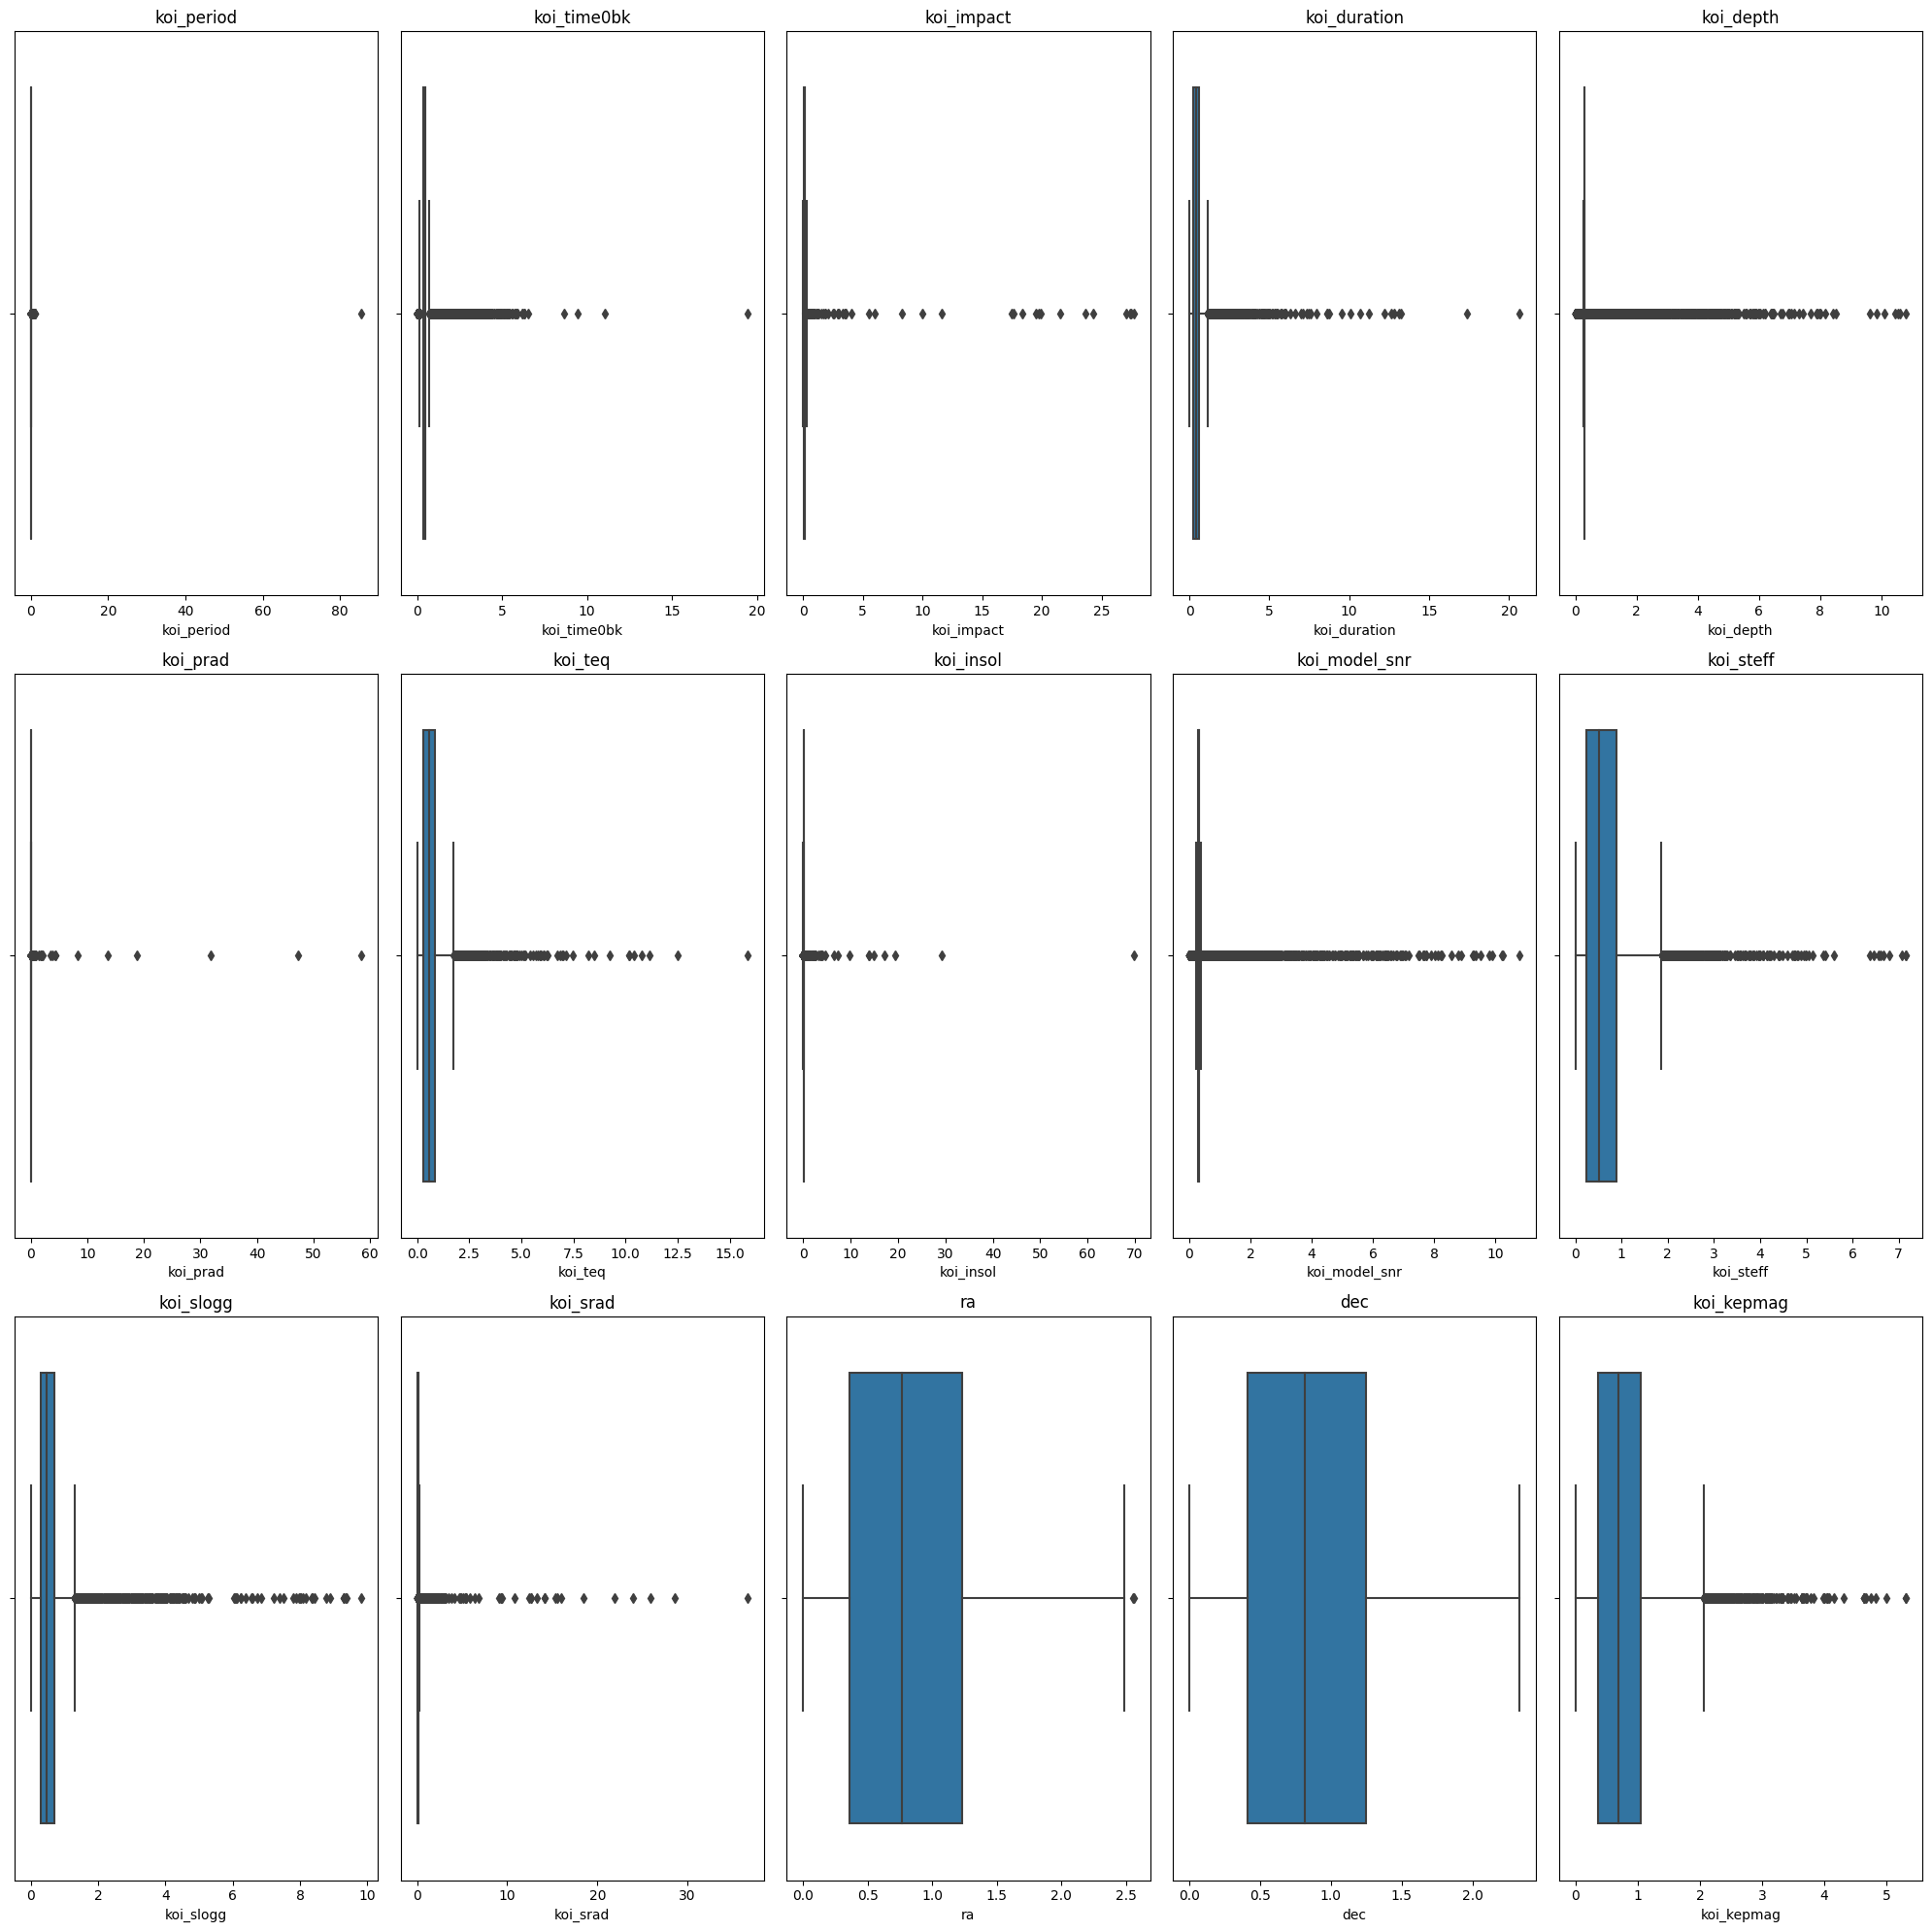

In [22]:
z_scores = stats.zscore(seen_data[numerical_vars])
abs_z_scores = np.abs(z_scores)
#_ = abs_z_scores.hist(figsize=(15,15),layout=(4,5))

fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(20, 20)

for ax, col in zip(axes.flatten(), numerical_vars):
  _ = sns.boxplot(x=abs_z_scores[col], ax=ax)
  _ = ax.set_title(col)

_ = plt.tight_layout()
_ = plt.show()

Let's display the number of observations that are further than i standard deviations.

In [23]:
rows = []
for col in numerical_vars:
  row = {}
  row['col'] = col
  for i in range(3, 10):
    row[f'sdt{i}'] = abs_z_scores[col].where(abs_z_scores[col] >= i).dropna().count()
  rows.append(row)
stds = pd.DataFrame(rows)
stds

,col,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9
0,koi_period,1,1,1,1,1,1,1
1,koi_time0bk,182,79,33,9,4,4,3
2,koi_impact,24,19,18,16,16,16,15
3,koi_duration,115,69,39,24,20,14,11
4,koi_depth,231,146,63,33,19,11,7
5,koi_prad,10,8,6,6,6,6,5
6,koi_teq,105,55,30,20,13,10,8
7,koi_insol,16,11,10,10,9,8,8
8,koi_model_snr,186,128,83,53,27,16,9
9,koi_steff,100,39,14,9,3,0,0


In order not to lose many values, let's assume as outliers the observations whose z_score is further than 5 stds.

In [24]:
seen_data = seen_data[(abs_z_scores < 5).all(axis=1)]
seen_data.shape

(7073, 16)

Now we use the Local Outlier factor. In here we will consider outliers the ones with a score bellow the 1 percentile, in order not to lose many observations.

In [25]:
# Remove outliers using Local Outlier Factor
for col in numerical_vars:
  local_outlier_factor = LocalOutlierFactor(n_neighbors=20)
  outlier_scores = local_outlier_factor.fit_predict(seen_data[[col]])
  threshold = np.percentile(outlier_scores, 1)
  good_rows = np.where(outlier_scores >= threshold)[0]
  seen_data = seen_data.iloc[good_rows]

seen_data.shape

(6939, 16)

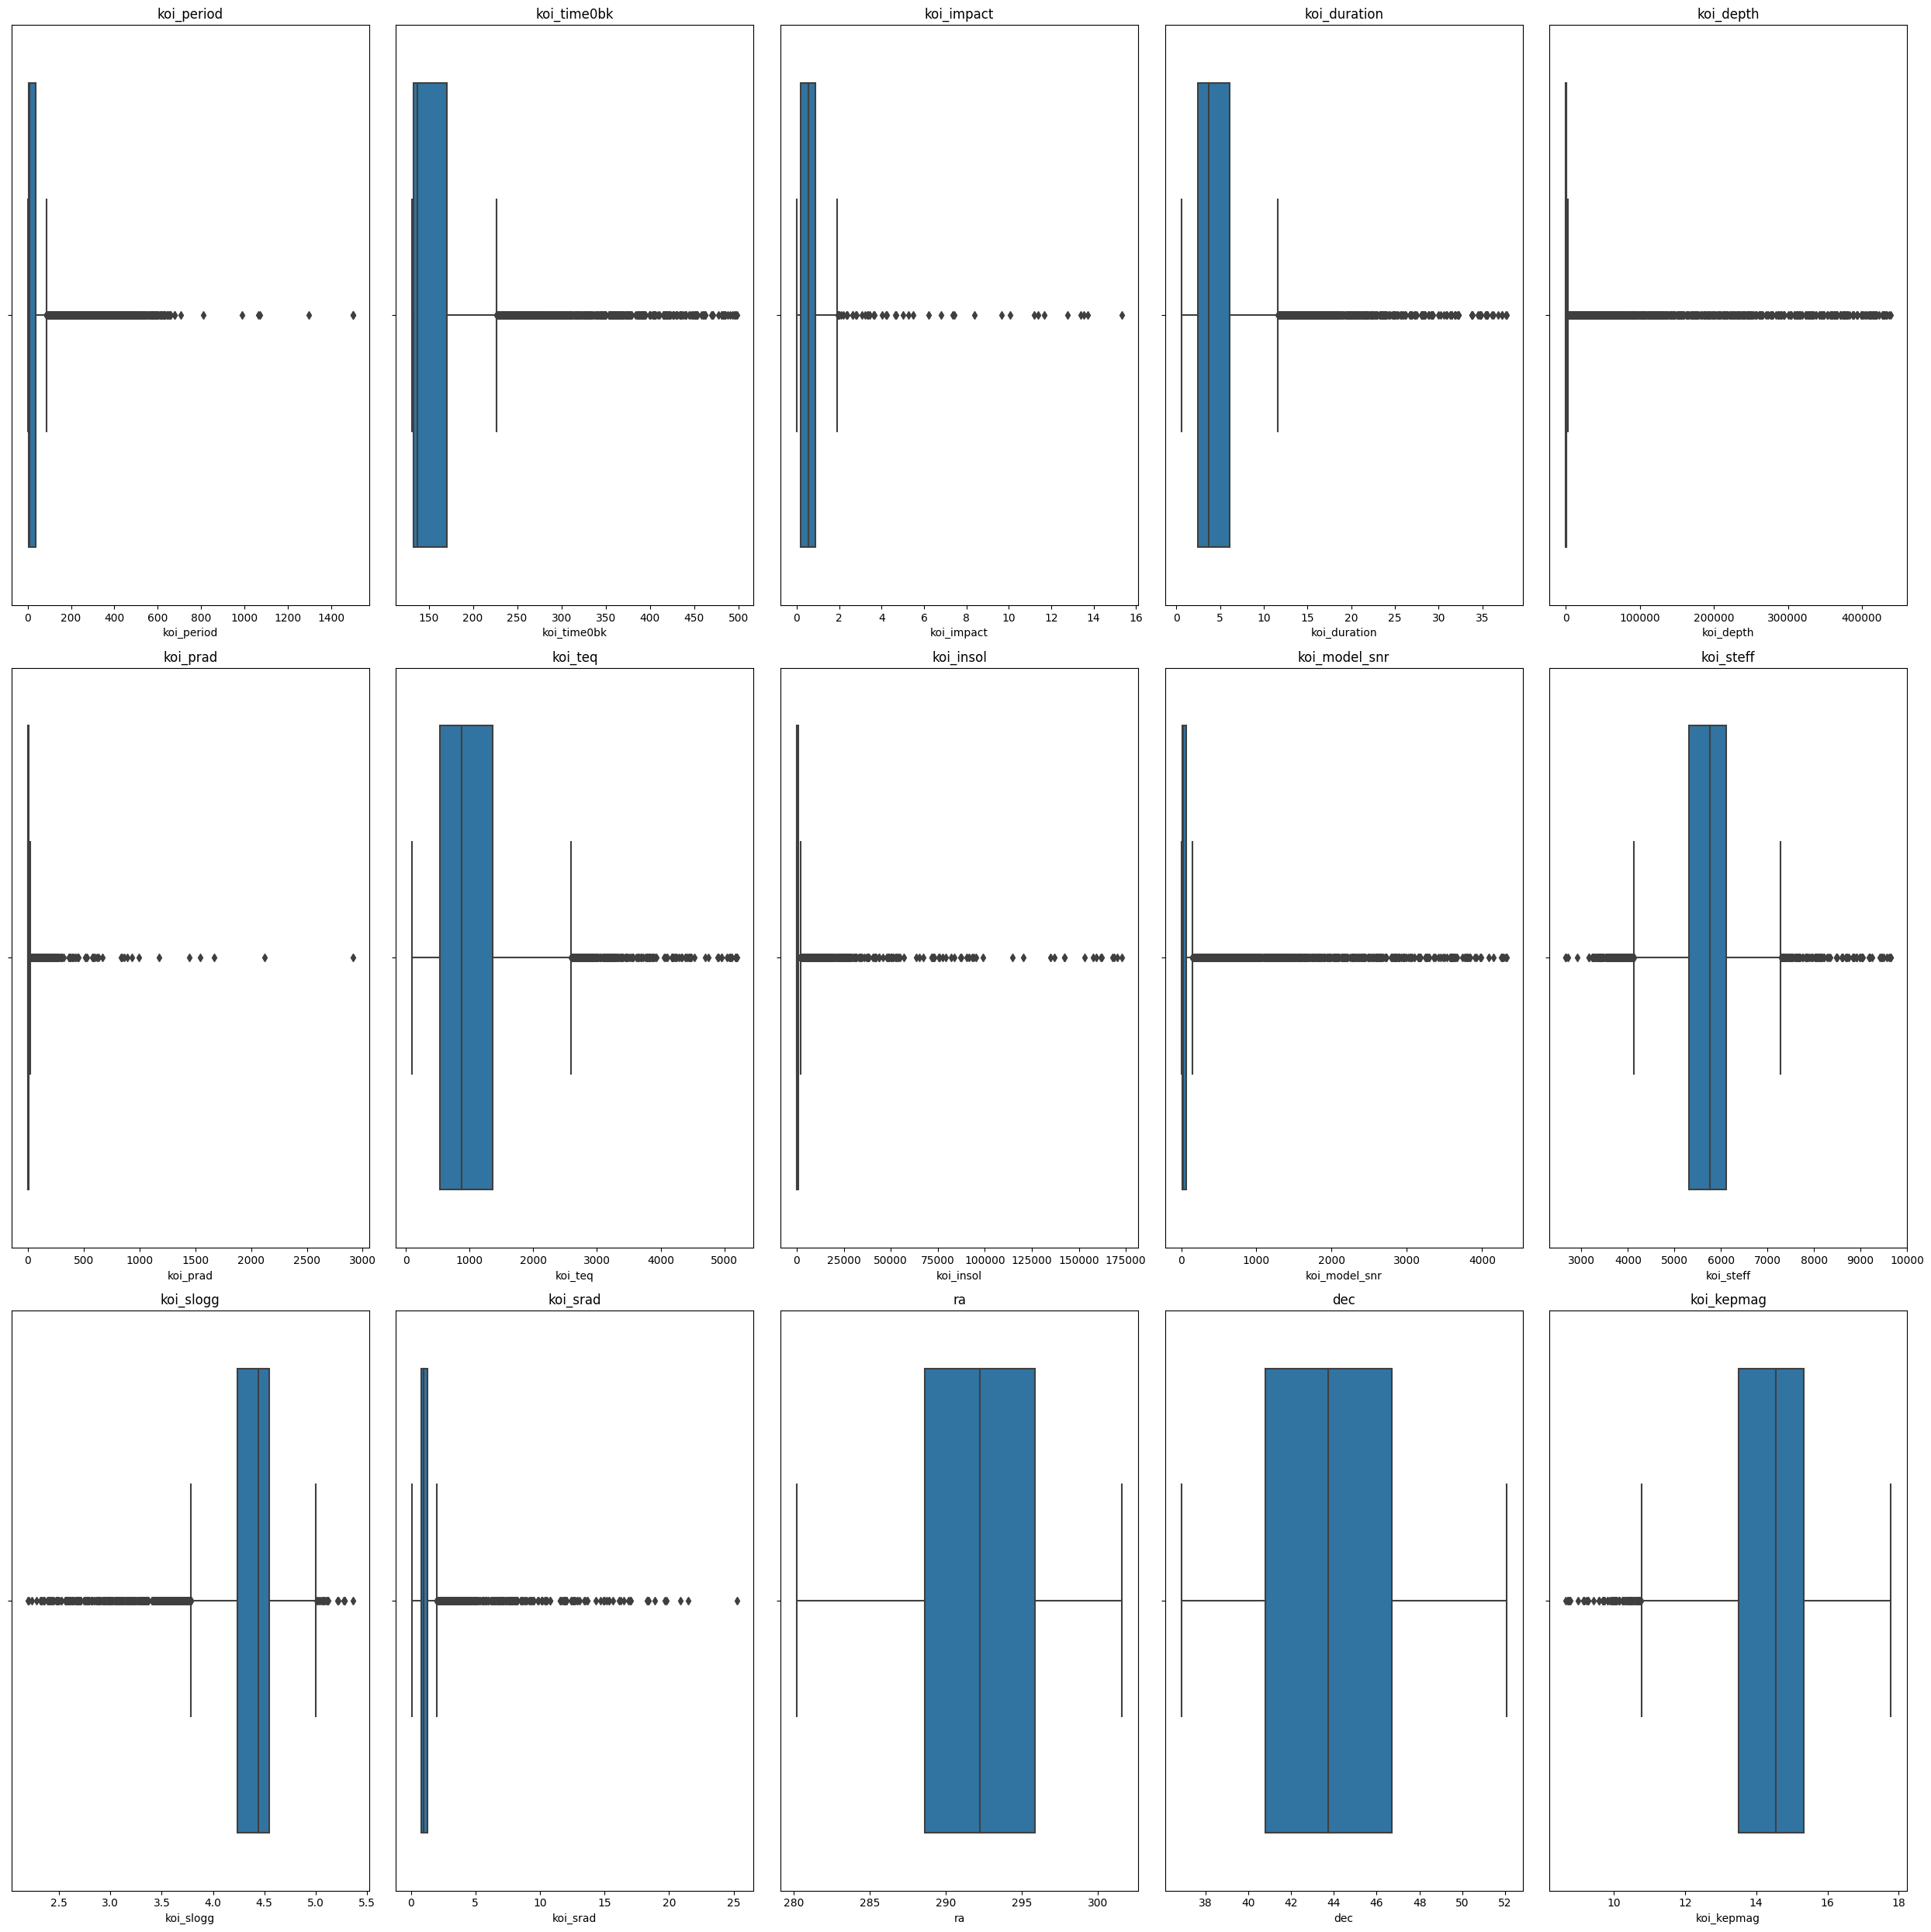

In [26]:
## Boxplot

fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(25, 25)

for ax, col in zip(axes.flatten(), numerical_vars):
    _ = sns.boxplot(x=seen_data[col], ax=ax)
    _ = ax.set_title(col)

_ = plt.tight_layout()
_ = plt.show()

### Feature Extraction

Based on domain knowledge, we extract insightful features that may be useful to predicting the target variable

In [27]:
seen_data['prad_srad_ratio'] = seen_data['koi_prad'] / seen_data['koi_srad']
seen_data['period_rot_ratio'] = seen_data['koi_period'] / seen_data['koi_steff']
seen_data['sma_srad_ratio'] = seen_data['koi_depth'] / seen_data['koi_srad']
seen_data['koi_insol_prad_ratio'] = seen_data['koi_insol'] * (seen_data['koi_prad'] ** 2)
seen_data[['prad_srad_ratio', 'period_rot_ratio', 'sma_srad_ratio', 'koi_insol_prad_ratio']]

,prad_srad_ratio,period_rot_ratio,sma_srad_ratio,koi_insol_prad_ratio
8117,0.803859,0.000097,68.810289,3.048126e+03
5245,1.813305,0.002421,353.004292,2.095521e+02
5865,0.565702,0.000151,12.739421,5.384670e+04
4050,6.121045,0.030445,3493.810179,2.495115e+01
5130,1.558266,0.002183,333.333333,6.336097e+01
...,...,...,...,...
5734,40.600000,0.000415,6070.000000,1.336457e+06
5191,2.348008,0.013154,572.327044,4.475699e+01
5390,42.709957,0.000198,6969.696970,8.443338e+06
860,4.277457,0.001138,1676.300578,1.893738e+03


### Normalization

Using StandardScaler or MinMaxScaler;  methods in scikit-learn that scale the data to have a mean of 0 and a variance of 1, while the other normalizes to the range of [0, 1], we normalize the data. We will experiment with both methods of normalization for our model creation.

In [28]:
seen_data2 = seen_data.copy()
# # Normalize the data
cols_not_to_normalize = ['is_single', 'snr_category', 'koi_duration_cat', 'koi_prad_cat', 'koi_teq_cat', 'koi_pdisposition']
cols_to_normalize = [col for col in seen_data.columns if col not in cols_not_to_normalize]
scaler = StandardScaler()
seen_data[cols_to_normalize] = scaler.fit_transform(seen_data[cols_to_normalize])
seen_data.head()

,koi_pdisposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,prad_srad_ratio,period_rot_ratio,sma_srad_ratio,koi_insol_prad_ratio
8117,FALSE POSITIVE,-0.475715,-0.534108,-0.452993,-0.714865,-0.287738,-0.232685,1.609900,0.351123,-0.330571,0.403193,0.435194,-0.276934,-2.067728,-0.041155,0.194948,-0.226736,-0.472627,-0.257150,-0.037310
5245,CANDIDATE,-0.361638,-0.387167,-0.729932,-0.589930,-0.283312,-0.219888,-0.418248,-0.210007,-0.307590,0.422183,0.476799,-0.277579,-1.323665,1.636105,-0.404428,-0.209169,-0.366030,-0.252965,-0.037312
5865,FALSE POSITIVE,-0.469510,-0.526738,0.023956,-0.699279,-0.288334,-0.225606,3.374179,3.286782,-0.321454,4.306856,-0.962716,0.570247,1.079087,-1.061637,-2.950249,-0.230880,-0.470145,-0.257975,-0.037266
4050,FALSE POSITIVE,0.831142,1.663047,0.487058,-0.070656,-0.246355,-0.182315,-1.086344,-0.217576,-0.316326,-0.573401,0.790219,-0.409951,0.245447,-0.595987,0.835608,-0.134203,0.919402,-0.206721,-0.037313
5130,CANDIDATE,-0.382854,-0.508354,-0.846861,-0.126349,-0.284700,-0.227240,-0.523515,-0.212679,-0.344435,-0.302124,0.765257,-0.402849,0.966559,0.775428,1.253795,-0.213607,-0.376950,-0.253255,-0.037313


In [29]:
# # Normalize the data
cols_not_to_normalize = ['is_single', 'snr_category', 'koi_duration_cat', 'koi_prad_cat', 'koi_teq_cat', 'koi_pdisposition']
cols_to_normalize = [col for col in seen_data2.columns if col not in cols_not_to_normalize]
scaler = MinMaxScaler()
seen_data2[cols_to_normalize] = scaler.fit_transform(seen_data2[cols_to_normalize])
seen_data2.head()

,koi_pdisposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,prad_srad_ratio,period_rot_ratio,sma_srad_ratio,koi_insol_prad_ratio
8117,FALSE POSITIVE,0.000226,0.000640,0.019049,0.034352,0.000121,0.000209,0.409483,0.031338,0.003702,0.475973,0.724921,0.032727,0.091880,0.448890,0.648181,0.000283,0.000185,0.000044,4.609950e-08
5245,CANDIDATE,0.009528,0.024430,0.007306,0.050513,0.000724,0.000532,0.126371,0.000424,0.006502,0.477975,0.729653,0.032687,0.258085,0.845276,0.562253,0.000911,0.007946,0.000233,3.169017e-09
5865,FALSE POSITIVE,0.000732,0.001833,0.039272,0.036368,0.000039,0.000388,0.655760,0.193070,0.004813,0.887586,0.565931,0.084836,0.794799,0.207720,0.197282,0.000134,0.000366,0.000006,8.143752e-07
4050,FALSE POSITIVE,0.106787,0.356366,0.058908,0.117685,0.005760,0.001480,0.033111,0.000007,0.005438,0.372998,0.765300,0.024545,0.608585,0.317767,0.740026,0.003594,0.101531,0.002327,3.771201e-10
5130,CANDIDATE,0.007798,0.004810,0.002348,0.110480,0.000535,0.000347,0.111677,0.000277,0.002013,0.401602,0.762461,0.024982,0.769663,0.641873,0.799978,0.000753,0.007151,0.000220,9.580289e-10


In [30]:
# ## Takes a while to RUN---Better to skip
# fig, axes = plt.subplots(6,4,figsize=(26,20))

# # 
# for i, c in enumerate(X_train.columns[1:]):
#     ax = axes.reshape(-1)[i]
#     if X_train[c].dtype.kind == 'O':
#         a = sns.countplot(x=c,data=X_train,ax=ax)
#     else:
#         b = sns.histplot(x=c,data=X_train,ax=ax)
#     t = ax.set_title(c)
# plt.tight_layout()

### Feature Reduction
*   Using correlation matrix to discover highly correlated features that may cause bias and multi-collinearity
*   Using PCA to determine the optimum dimension for our features

#### Correlation Matrix
Using threshold for correlation coefficient (r) value of 0.8 or higher.

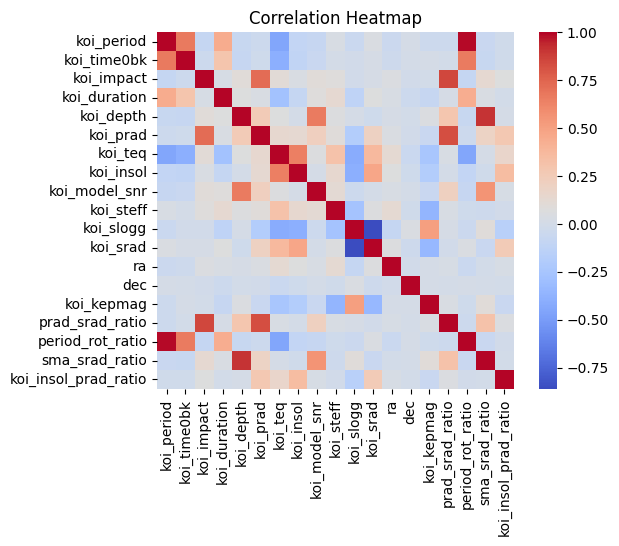

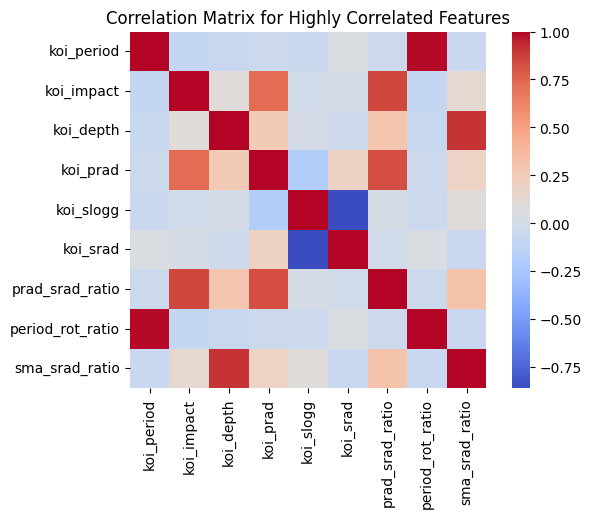

Highly correlated features:
Index(['koi_period', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_slogg',
       'koi_srad', 'prad_srad_ratio', 'period_rot_ratio', 'sma_srad_ratio'],
      dtype='object')


In [31]:
rcParams['figure.figsize'] = 6.552, 4.6312

# Create a correlation matrix
correlation_matrix = seen_data.corr()

# Plot the correlation heatmap
_ = plt.figure()
_ = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
_ = plt.title("Correlation Heatmap")

# Find highly correlated features
threshold = 0.8  # Define the correlation threshold
correlation_threshold = abs(correlation_matrix) > threshold
np.fill_diagonal(correlation_threshold.values, False)  # Exclude diagonal values
highly_correlated = correlation_matrix.columns[correlation_threshold.any()]

# Plot correlation matrix for highly correlated features (if any)
try:
    _ = plt.figure()
    _ = sns.heatmap(seen_data[highly_correlated].corr(), annot=False, cmap='coolwarm', square=True)
    _ = plt.title("Correlation Matrix for Highly Correlated Features")
except ValueError:
    print("No highly correlated features to plot.")

# Display the plots
_ = plt.savefig("correlations.png", format='png')
_ = plt.show();

# Print the highly correlated features
print("Highly correlated features:")
print(highly_correlated)

#### PCA 

Now it's time to perform some dimensionality reduction with PCA. We first plot the explained variance and we can see that around 30 principal components there is not a lot of variance lost. We can then reduce our features to said 30 principal components.


Text(0.5, 0, 'Number of Principal Components')

Text(0, 0.5, 'Variance Explained (%)')

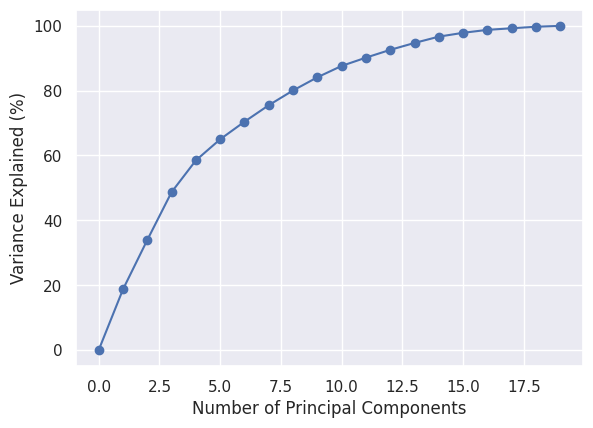

In [32]:
def fit_PCA(X_train, n_components='mle'):
    X_train_encoded = pd.get_dummies(X_train)
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_encoded)
    return X_train_pca, sum(pca.explained_variance_ratio_ * 100)

variance_explained = []
for i in range(seen_data.shape[1]):
    seen_data_pca, variance_exp = fit_PCA(seen_data, n_components=i)
    variance_explained.append(variance_exp)

sns.set()
plt.plot(range(seen_data.shape[1]), variance_explained, marker="o")
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained (%)')
plt.show()


### Pre-process Function

After this findings we can now create a preprocess function.

In [33]:

def preprocess(
    pre_data, pre_y,
    target_feature='koi_pdisposition', 
    domain_knowledge_disposable_cols=['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    ignore_error_cols=True,
    max_z_score = 5,
    lof_threshold = 0.5,
    scaler_class = MinMaxScaler,
    outlier_class = LocalOutlierFactor,
    pca_dims = 'mle',
    use_pca = False,
    display_resulting_df = True,
    imputer_class=None,
    imputer_args={"n_neighbors":9, "weights": "uniform"}
):
    print(f"Initial shape: {pre_data.shape}")
    # Drop disposable features that pose no interest due to domain knowledge.
    X = pre_data.drop(columns = domain_knowledge_disposable_cols)
    print(f"Shape after disposable columns drop: {X.shape}")

    # Drop features where more than 50% of values are null
    X.drop(columns = [i for i in X.columns if (X[i].isna().sum() > X[i].count()/2) == True], inplace = True)
    print(f"Shape after cols with more than 50% nulls drop: {X.shape}")

    categorical_vars = [target_feature]
    numerical_vars = [col for col in X.columns if col not in categorical_vars]

    # Perform KNN imputation on the rest of numerical variables
    if imputer_class is not None:
      imputer = imputer_class(**imputer_args)
      X = pd.DataFrame(imputer.fit_transform(X[numerical_vars]), columns=numerical_vars)
      print(f"Shape after imputation: {X.shape}")
    else:
      X = X.dropna()
      print(f"Shape after dropping rest of nulls: {X.shape}")

    # Remove outliers using Z-score
    z_scores = stats.zscore(X)
    abs_z_scores = np.abs(z_scores)
    X = pd.DataFrame(X[(abs_z_scores < max_z_score).all(axis=1)], columns=numerical_vars)
    print(f"Shape after outlier z-score drop: {X.shape}")

    if type(outlier_class) == IsolationForest:
      # Predict outliers using IsolationForest
      isol = IsolationForest()
      X["outlier"] = isol.fit_predict(X)
      X = X.loc[X["outlier"] == 1]
      X.drop(columns=["outlier"], inplace=True)
    else:
      # Remove outliers using Local Outlier Factor
      for col in numerical_vars:
        local_outlier_factor = LocalOutlierFactor(n_neighbors=50)
        outlier_scores = local_outlier_factor.fit_predict(X[[col]])
        threshold = np.percentile(outlier_scores, lof_threshold)
        good_rows = np.where(outlier_scores >= threshold)[0]
        X = X.iloc[good_rows]
    print(f"Shape after outlier drop: {X.shape}")

    # # Derive new features for exoplanet classification
    X['prad_srad_ratio'] = X['koi_prad'] / X['koi_srad']
    X['period_rot_ratio'] = X['koi_period'] / X['koi_steff']
    X['sma_srad_ratio'] = X['koi_depth'] / X['koi_srad']
    X['koi_insol_prad_ratio'] = X['koi_insol'] * (X['koi_prad'] ** 2)
    print(f"Shape after feature derivation: {X.shape}")

    # Create categorical features based on numerical features
    X['koi_duration_cat'] = pd.cut(X['koi_duration'], bins=[0, 2.4, 3.7, 6.0, 41], labels=['Very Short', 'Short', 'Medium', 'Long'])
    X['koi_prad_cat'] = pd.cut(X['koi_prad'], bins=[0, 1.4, 2.35, 10.75, 2910], labels=['Very Small', 'Small', 'Medium', 'Large'])
    X['koi_teq_cat'] = pd.cut(X['koi_teq'], bins=[0, 535, 870, 1359.5, 5470], labels=['Very Low', 'Low', 'Medium', 'High'])
    X['koi_model_snr_cat'] = pd.cut(X['koi_model_snr'], bins=[0, 12.2, 23.4, 76.8, 4640], labels=['Very Low', 'Low', 'Medium', 'High'])
    print(f"Shape after creating categorical features based on numerical features: {X.shape}")

    # # Normalize the data
    cols_not_to_normalize = ['koi_model_snr_cat', 'koi_duration_cat', 'koi_prad_cat', 'koi_teq_cat', 'koi_pdisposition']
    cols_to_normalize = [col for col in X.columns if col not in cols_not_to_normalize]
    scaler = scaler_class()
    X[cols_to_normalize] = scaler.fit_transform(X[cols_to_normalize])
    print(f"Shape after normalization: {X.shape}")


    # # # Drop unnecessary columns based on multicollinearity and feature importance
    col_drop = ['koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1','koi_prad_err2',
                'koi_teq','koi_insol','koi_insol_err1','koi_insol_err2', 'koi_model_snr','koi_steff',
                'koi_steff_err1',  'koi_period_err2','koi_time0bk_err2', 'koi_duration_err2',
                'koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad',
                'koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag']

    X = X.drop(columns=col_drop)

    if use_pca:
      X = pd.get_dummies(X)
      X, variance_exp = fit_PCA(X, n_components=pca_dims)
      X = pd.DataFrame(X, columns=[f"PC{i}" for i in range(len(X[0]))])
      print(f"Shape after PCA: {X.shape}")
     

    Xy = pd.concat([X, pre_y], axis=1)

    Xy.dropna(inplace=True)
    print(f"Final shape: {X.shape}")

    if display_resulting_df:
      display(Xy.head())

    return Xy


#### Execute the pre-processing function
*   Split the dataset into features (X) and target variable (y)
*   Perform KNN imputation on numerical variables
*   Remove outliers
*   Derive new features for exoplanet classification
*   Create categorical features
*   Normalize the data using StandardScaler
*   Feature Reduction 


In [34]:
# Load clean version of the dataset, split into train and test
exoplanets = read_kaggle_dataset(kaggle_url, file_name)
# Splitting the target variable from the rest of the data
y = exoplanets['koi_pdisposition']
X = exoplanets.drop('koi_pdisposition', axis=1)
# Now, we can create our training and testing datasets
seen_data, unseen_data, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

processed_seen = preprocess(seen_data, y_train, display_resulting_df=True)
processed_unseen = preprocess(unseen_data, y_test, display_resulting_df=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 38)
Shape after cols with more than 50% nulls drop: (7651, 36)
Shape after dropping rest of nulls: (6226, 36)
Shape after outlier z-score drop: (5701, 36)
Shape after outlier drop: (5532, 36)
Shape after feature derivation: (5532, 40)
Shape after creating categorical features based on numerical features: (5532, 44)
Shape after normalization: (5532, 44)
Final shape: (5532, 18)


,koi_score,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,prad_srad_ratio,period_rot_ratio,sma_srad_ratio,koi_insol_prad_ratio,koi_duration_cat,koi_prad_cat,koi_teq_cat,koi_model_snr_cat,koi_pdisposition
8465,0.000,0.002890,0.000363,0.034394,0.075216,0.210397,0.001143,0.765604,0.158859,0.084372,0.000970,0.002170,0.000017,8.021166e-07,Medium,Small,High,Medium,FALSE POSITIVE
1398,1.000,0.010721,0.000054,0.034605,0.003285,0.012312,0.001043,0.979793,0.179015,0.003678,0.019409,0.009226,0.002723,8.454451e-06,Long,Large,High,High,CANDIDATE
4806,1.000,0.073892,0.011385,0.045383,0.113764,0.038030,0.006479,0.937584,0.098699,0.126152,0.004460,0.109013,0.000744,5.569807e-11,Short,Very Small,Very Low,Low,CANDIDATE
3480,1.000,0.021049,0.001440,0.047057,0.049219,0.249248,0.001023,0.715312,0.020541,0.055656,0.004546,0.020410,0.000285,1.233482e-08,Very Short,Small,Low,Low,CANDIDATE
2256,0.868,0.015121,0.003318,0.053663,0.155180,0.238851,0.000040,0.721150,0.212149,0.132036,0.001956,0.016919,0.000020,4.601674e-07,Long,Medium,High,Low,CANDIDATE


Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 38)
Shape after cols with more than 50% nulls drop: (1913, 36)
Shape after dropping rest of nulls: (1577, 36)
Shape after outlier z-score drop: (1436, 36)
Shape after outlier drop: (1431, 36)
Shape after feature derivation: (1431, 40)
Shape after creating categorical features based on numerical features: (1431, 44)
Shape after normalization: (1431, 44)
Final shape: (1431, 18)


,koi_score,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,prad_srad_ratio,period_rot_ratio,sma_srad_ratio,koi_insol_prad_ratio,koi_duration_cat,koi_prad_cat,koi_teq_cat,koi_model_snr_cat,koi_pdisposition
3321,1.000,0.051382,0.001636,0.151073,0.017905,0.444054,0.000633,0.741171,0.110120,0.029897,0.013362,0.044792,0.000874,3.119167e-08,Medium,Medium,Low,Medium,CANDIDATE
3655,0.000,0.002081,0.000313,0.031225,0.062159,0.237832,0.000058,0.799742,0.104771,0.061379,0.008251,0.002063,0.000759,1.158750e-07,Medium,Small,Medium,Low,FALSE POSITIVE
4923,1.000,0.000125,0.000022,0.030031,0.009318,0.167587,0.002226,0.856158,0.031803,0.011241,0.005215,0.000187,0.000227,1.552642e-06,Very Short,Small,High,Medium,CANDIDATE
2124,0.982,0.207123,0.022397,0.085900,0.064990,0.012042,0.008213,0.989664,0.156242,0.066552,0.013000,0.179460,0.001497,2.078007e-09,Medium,Medium,Very Low,Low,CANDIDATE
2819,0.000,0.019957,0.001530,0.160818,0.039891,0.600602,0.129342,0.996985,0.235421,0.078276,0.115548,0.015542,0.000399,4.527140e-06,Long,Large,Medium,Medium,FALSE POSITIVE


In [35]:
# Split the dataset into features (X) and target variable (y)
X_train = processed_seen.drop('koi_pdisposition', axis=1)
y_train = processed_seen['koi_pdisposition']

# Split the dataset into features (X) and target variable (y)
X_test = processed_unseen.drop('koi_pdisposition', axis=1)
y_test = processed_unseen['koi_pdisposition']

In [36]:
categorical_vars = ['koi_pdisposition', 'koi_model_snr_cat', 'koi_duration_cat', 
                    'koi_prad_cat', 'koi_teq_cat']

non_categorical_vars = [col for col in X_train.columns if col not in categorical_vars]

In [ ]:
# # define categorical variables and features
# features = [col for col in X_train.columns if col not in categorical_vars]

# # sample data and set up plot
# sample = X_train.sample(frac=0.05)
# fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 25))
# axes = axes.flatten();

# # plot histograms for each feature
# for ax, col in zip(axes, features):
#    _ = sns.histplot(sample[col], ax=ax, kde=True)
#    _ = ax.set_title(col);



### Pre-processing Argument

In [38]:
preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    # "imputer_class": KNNImputer,
    # "imputer_args": {"n_neighbors": 5, "weights": "uniform"}
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": True
    }

## Modeling

Now it's time to experiment with some models.

### Run Model Function

This function works to execute and try different models with different configurations for training, validation and testing

In [39]:
##Training and Cross-Validation

rcParams['figure.figsize'] = 4.5864, 3.24184

results = defaultdict(dict)

def run_model(preprocess_func, model_class, preprocess_args, model_args, 
              kaggle_url="https://www.kaggle.com/datasets/arashnic/exoplanets", 
              file_name="exoplanets.csv", use_pca=False, pca_dims=10, boost=False,importance=False):
  
  # Load clean version of the dataset, split into train and test
  exoplanets = read_kaggle_dataset(kaggle_url, file_name)
  
  # Splitting the target variable from the rest of the data
  y = exoplanets[preprocess_args['target_feature']]
  X = exoplanets.drop(preprocess_args['target_feature'], axis=1)
  
  # Now, we can create our training and testing datasets
  seen_data, unseen_data, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42, stratify=y)
  
  processed_seen = preprocess(seen_data, y_train, **preprocess_args)
  processed_unseen = preprocess(unseen_data, y_test, **preprocess_args)
  
  y_train = processed_seen[preprocess_args['target_feature']]
  X_train = processed_seen.drop(preprocess_args['target_feature'], axis=1)
  y_test = processed_unseen[preprocess_args['target_feature']]
  X_test = processed_unseen.drop(preprocess_args['target_feature'], axis=1)
  
  # Extract the categorical features for encoding
  cat_features = ['koi_model_snr_cat', 'koi_duration_cat', 'koi_prad_cat', 'koi_teq_cat']
  
  # Apply Ordinal Encoding to categorical features
  encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
  X_train[cat_features] = encoder.fit_transform(X_train[cat_features])
  X_test[cat_features] = encoder.transform(X_test[cat_features])
  
  # Convert categorical features to one-hot encoding
  X_train = pd.get_dummies(X_train)
  X_test = pd.get_dummies(X_test)
  
  # Drop the original categorical columns
  X_train.drop(columns=cat_features, inplace=True)
  X_test.drop(columns=cat_features, inplace=True)

  if boost:
  # Encode target variable y
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
  
  # Create and fit model
  model = model_class(**model_args)
  model.fit(X_train, y_train)
  
  # Predict and contrast against test set
  y_pred = model.predict(X_test)
  
  # Calculate and perform cross-validation
  scores = cross_val_score(model, X_train, y_train, cv=8)
  
  accuracy = scores.mean()
  
  # Define the class labels
  class_labels = ['CANDIDATE', 'FALSE POSITIVE']

  # Generate the classification report with labeled class names
  report = classification_report(y_test, y_pred, target_names=class_labels)

  print("\n")

  # Print the classification report
  print("Classification Report:")
  print(report)
  
  display(f"Mean accuracy after cross validation: {accuracy}")

  if importance:
    # Get feature importances
    importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})

    # Add feature importance visualization
    print("\nFeature Importance:")
    mean_gain = importances[['Importance', 'Feature']].groupby('Feature').mean()
    mean_gain = mean_gain.reset_index()
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6, 8))
    sns.barplot(x='Importance', y='Feature', data=mean_gain.sort_values('Importance', ascending=False), palette='icefire')
  
  # return y_pred, scores, model
  return X_train, y_train, X_test, y_test, y_pred, scores, model


In [40]:
## Testing Validation

# Create an empty DataFrame to store the results
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision'])

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          display_labels=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for _ in range(cf.size)]

    group_labels = ["{}\n".format(value) for value in group_names] if group_names and len(group_names) == cf.size else blanks

    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()] if count else blanks

    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)] if percent else blanks

    box_labels = [f"{label}{count}{percentage}".strip() for label, count, percentage in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # If it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    figsize = figsize or plt.rcParams.get('figure.figsize')

    if not xyticks:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)


def validate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    labels = ['True Negative', 'False Positivee', 'False Negative', 'True Positive']
    categories = ['CANDIDATE', 'FALSE-POSITIVE']
    plt.style.use('seaborn-poster')
    sns.set(font_scale=1.4)
    make_confusion_matrix(cf_matrix,
                          group_names=labels,
                          categories=categories,
                          cmap='vlag',
                          figsize=(6, 4),
                          display_labels=model.classes_)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
    precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
    print("\nValidation Test Results:")
    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}")
    plt.show()

    # Add the results to the DataFrame
    results_table.loc[len(results_table)] = [model, accuracy, recall, precision]


#### Random Forest Classifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 38)
Shape after cols with more than 50% nulls drop: (7651, 36)
Shape after dropping rest of nulls: (6226, 36)
Shape after outlier z-score drop: (5379, 36)
Shape after outlier drop: (5153, 36)
Shape after feature derivation: (5153, 40)
Shape after creating categorical features based on numerical features: (5153, 44)
Shape after normalization: (5153, 44)
Final shape: (5153, 18)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 38)
Shape after cols with more than 50% nulls drop: (1913, 36)
Shape after dropping rest of nulls: (1577, 36)
Shape after outlier z-score drop: (1368, 36)
Shape after outlier drop: (1368, 36)
Shape after feature derivation: (1368, 40)
Shape after creating categorical features based on numerical features: (1368, 44)
Sh

'Mean accuracy after cross validation: 0.9627407434156676'


Feature Importance:

Validation Test Results:
Accuracy: 0.9619883040935673, Recall: [0.95590143 0.96984925], Precision: [0.97615894 0.94453507]


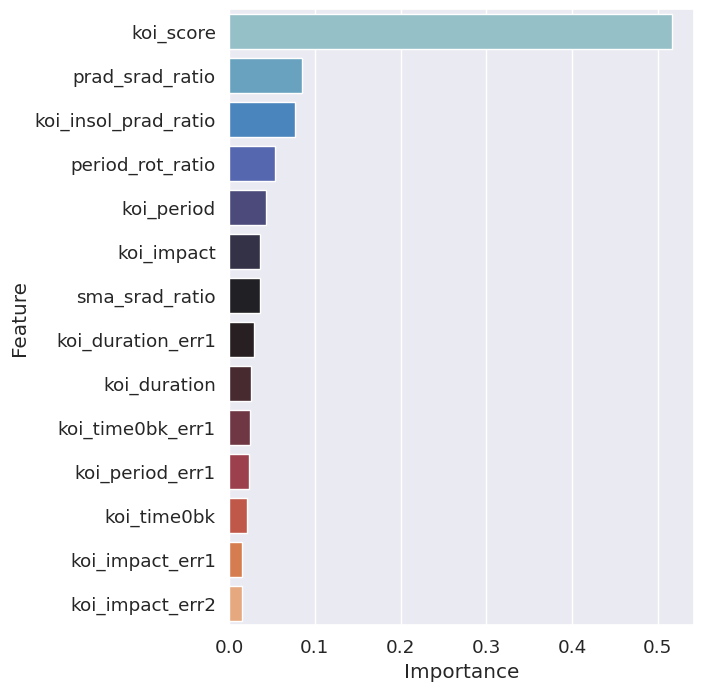

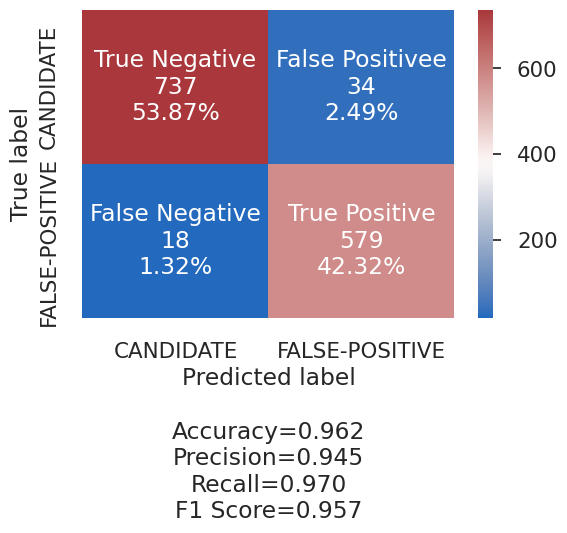

In [41]:
## Random Forest Classifier

preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }

model_args = {
    "n_estimators": 280, 
    "random_state": 42, 
    "criterion": "log_loss", 
    "max_depth": 80
}

# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(preprocess, RandomForestClassifier, preprocess_args, model_args, boost=True, importance=True)
results['random_forest'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)


# Call the validate_model function with the model object
validate_model(model, X_test, y_test)

#### Random Forest without koi_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 37)
Shape after cols with more than 50% nulls drop: (7651, 35)
Shape after dropping rest of nulls: (7187, 35)
Shape after outlier z-score drop: (6268, 35)
Shape after outlier drop: (6083, 35)
Shape after feature derivation: (6083, 39)
Shape after creating categorical features based on numerical features: (6083, 43)
Shape after normalization: (6083, 43)
Final shape: (6083, 17)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 37)
Shape after cols with more than 50% nulls drop: (1913, 35)
Shape after dropping rest of nulls: (1805, 35)
Shape after outlier z-score drop: (1573, 35)
Shape after outlier drop: (1566, 35)
Shape after feature derivation: (1566, 39)
Shape after creating categorical features based on numerical features: (1566, 43)
Sh

'Mean accuracy after cross validation: 0.8369261791963483'


Feature Importance:

Validation Test Results:
Accuracy: 0.8058748403575989, Recall: [0.93735499 0.64488636], Precision: [0.7637051  0.89370079]


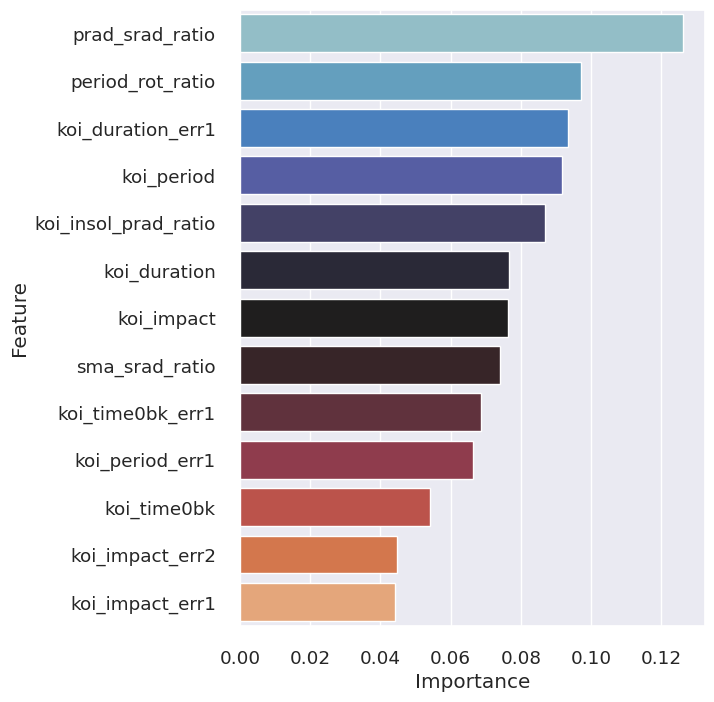

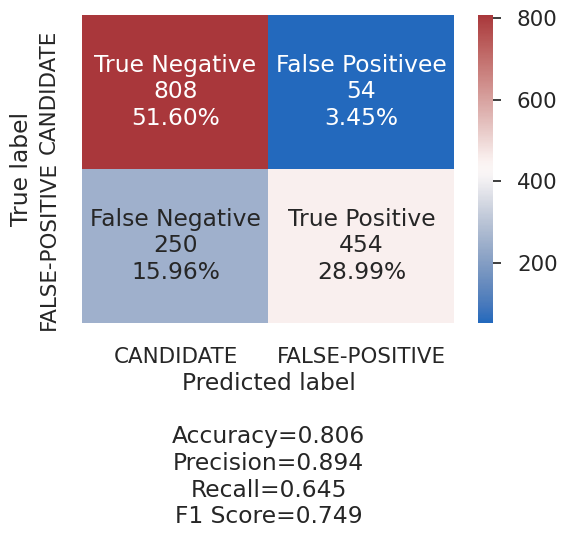

In [42]:
## Random Forest Classifier

preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['koi_score', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }

model_args = {
    "n_estimators": 280, 
    "random_state": 42, 
    "criterion": "log_loss", 
    "max_depth": 80
}

# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(preprocess, RandomForestClassifier, preprocess_args, model_args, boost=True, importance=True)
results['random_forest_no_koi_score'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)


# Call the validate_model function with the model object
validate_model(model, X_test, y_test)

#### Multi Layer Perceptron Classifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 38)
Shape after cols with more than 50% nulls drop: (7651, 36)
Shape after dropping rest of nulls: (6226, 36)
Shape after outlier z-score drop: (5379, 36)
Shape after outlier drop: (5153, 36)
Shape after feature derivation: (5153, 40)
Shape after creating categorical features based on numerical features: (5153, 44)
Shape after normalization: (5153, 44)
Final shape: (5153, 18)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 38)
Shape after cols with more than 50% nulls drop: (1913, 36)
Shape after dropping rest of nulls: (1577, 36)
Shape after outlier z-score drop: (1368, 36)
Shape after outlier drop: (1368, 36)
Shape after feature derivation: (1368, 40)
Shape after creating categorical features based on numerical features: (1368, 44)
Sh

'Mean accuracy after cross validation: 0.9611885502431508'


Validation Test Results:
Accuracy: 0.9554093567251462, Recall: [0.95071336 0.96147404], Precision: [0.96957672 0.9379085 ]


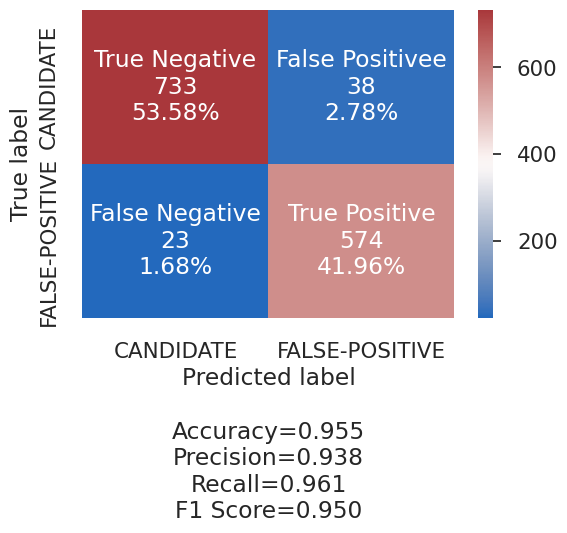

In [43]:
### Multi Layer Perceptron Classifier


preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }

model_args = {
    "hidden_layer_sizes": (500, 50, 5), 
    "random_state": 42, 
    "activation": 'tanh'
}


# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(preprocess, MLPClassifier, preprocess_args, model_args, boost=True)
results['ml_perceptron'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)


# Call the validate_model function with the model object
validate_model(model, X_test, y_test)

#### Multi Layer Perceptron without koi_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 37)
Shape after cols with more than 50% nulls drop: (7651, 35)
Shape after dropping rest of nulls: (7187, 35)
Shape after outlier z-score drop: (6268, 35)
Shape after outlier drop: (6083, 35)
Shape after feature derivation: (6083, 39)
Shape after creating categorical features based on numerical features: (6083, 43)
Shape after normalization: (6083, 43)
Final shape: (6083, 17)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 37)
Shape after cols with more than 50% nulls drop: (1913, 35)
Shape after dropping rest of nulls: (1805, 35)
Shape after outlier z-score drop: (1573, 35)
Shape after outlier drop: (1566, 35)
Shape after feature derivation: (1566, 39)
Shape after creating categorical features based on numerical features: (1566, 43)
Sh

'Mean accuracy after cross validation: 0.8323194031399128'


Validation Test Results:
Accuracy: 0.8071519795657727, Recall: [0.92111369 0.66761364], Precision: [0.77237354 0.87360595]


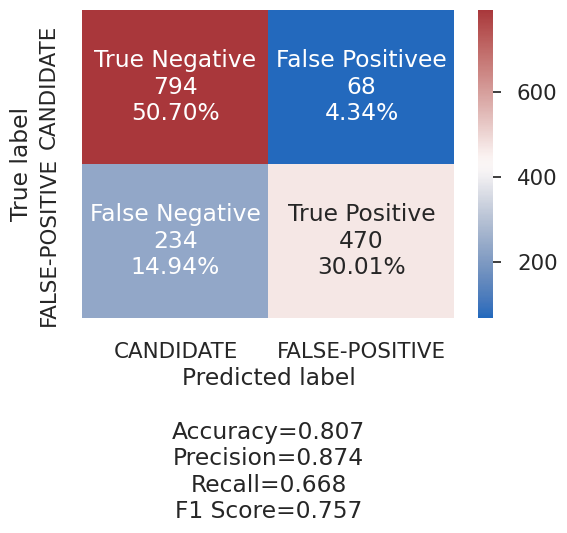

In [44]:
### Multi Layer Perceptron Classifier


preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['koi_score', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }

model_args = {
    "hidden_layer_sizes": (500, 50, 5), 
    "random_state": 42, 
    "activation": 'tanh'
}


# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(preprocess, MLPClassifier, preprocess_args, model_args, boost=True)
results['ml_perceptron_no_koi_score'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)


# Call the validate_model function with the model object
validate_model(model, X_test, y_test)

#### Support Vector Classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 38)
Shape after cols with more than 50% nulls drop: (7651, 36)
Shape after dropping rest of nulls: (6226, 36)
Shape after outlier z-score drop: (5379, 36)
Shape after outlier drop: (5153, 36)
Shape after feature derivation: (5153, 40)
Shape after creating categorical features based on numerical features: (5153, 44)
Shape after normalization: (5153, 44)
Final shape: (5153, 18)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 38)
Shape after cols with more than 50% nulls drop: (1913, 36)
Shape after dropping rest of nulls: (1577, 36)
Shape after outlier z-score drop: (1368, 36)
Shape after outlier drop: (1368, 36)
Shape after feature derivation: (1368, 40)
Shape after creating categorical features based on numerical features: (1368, 44)
Sh

'Mean accuracy after cross validation: 0.9592463527372526'


Validation Test Results:
Accuracy: 0.9583333333333334, Recall: [0.95201038 0.96649916], Precision: [0.9734748  0.93973941]


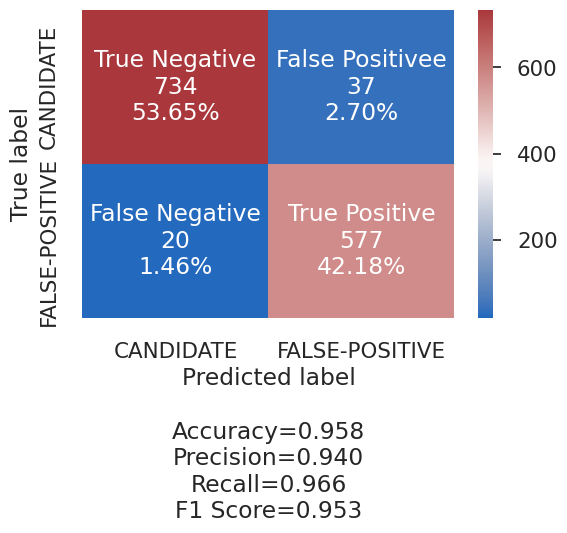

In [45]:
### Support Vector Classifier

preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }

model_args = {
    "random_state": 42,
    "C": 50,
    "kernel": 'rbf',
    "gamma": 'auto'
}


# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(preprocess, SVC, preprocess_args, model_args, boost=True)
results['svc'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)


# Call the validate_model function with the model object
validate_model(model, X_test, y_test)

#### Support Vector Classification without koi_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 37)
Shape after cols with more than 50% nulls drop: (7651, 35)
Shape after dropping rest of nulls: (7187, 35)
Shape after outlier z-score drop: (6268, 35)
Shape after outlier drop: (6083, 35)
Shape after feature derivation: (6083, 39)
Shape after creating categorical features based on numerical features: (6083, 43)
Shape after normalization: (6083, 43)
Final shape: (6083, 17)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 37)
Shape after cols with more than 50% nulls drop: (1913, 35)
Shape after dropping rest of nulls: (1805, 35)
Shape after outlier z-score drop: (1573, 35)
Shape after outlier drop: (1566, 35)
Shape after feature derivation: (1566, 39)
Shape after creating categorical features based on numerical features: (1566, 43)
Sh

'Mean accuracy after cross validation: 0.753580814717477'


Validation Test Results:
Accuracy: 0.7266922094508301, Recall: [0.95591647 0.44602273], Precision: [0.67874794 0.89204545]


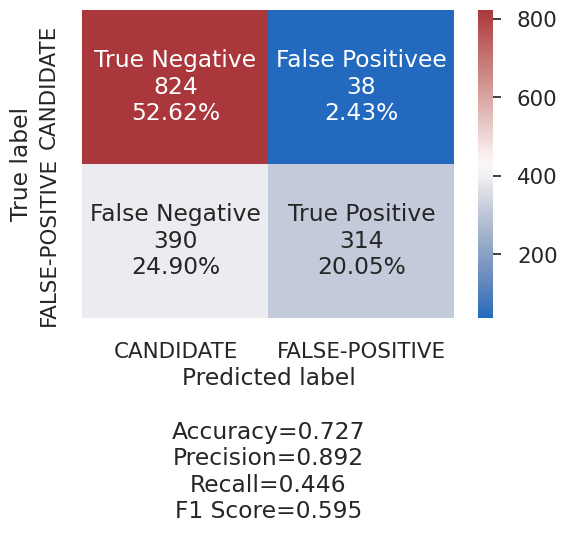

In [46]:
### Support Vector Classifier

preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['koi_score', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }

model_args = {
    "random_state": 42,
    "C": 50,
    "kernel": 'rbf',
    "gamma": 'auto'
}


# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(preprocess, SVC, preprocess_args, model_args, boost=True)
results['svc_no_koi_score'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)


# Call the validate_model function with the model object
validate_model(model, X_test, y_test)

#### XGBOOST

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 38)
Shape after cols with more than 50% nulls drop: (7651, 36)
Shape after dropping rest of nulls: (6226, 36)
Shape after outlier z-score drop: (5379, 36)
Shape after outlier drop: (5153, 36)
Shape after feature derivation: (5153, 40)
Shape after creating categorical features based on numerical features: (5153, 44)
Shape after normalization: (5153, 44)
Final shape: (5153, 18)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 38)
Shape after cols with more than 50% nulls drop: (1913, 36)
Shape after dropping rest of nulls: (1577, 36)
Shape after outlier z-score drop: (1368, 36)
Shape after outlier drop: (1368, 36)
Shape after feature derivation: (1368, 40)
Shape after creating categorical features based on numerical features: (1368, 44)
Sh

'Mean accuracy after cross validation: 0.96118915210169'


Feature Importance:

Validation Test Results:
Accuracy: 0.9612573099415205, Recall: [0.96498054 0.95644891], Precision: [0.96623377 0.9548495 ]


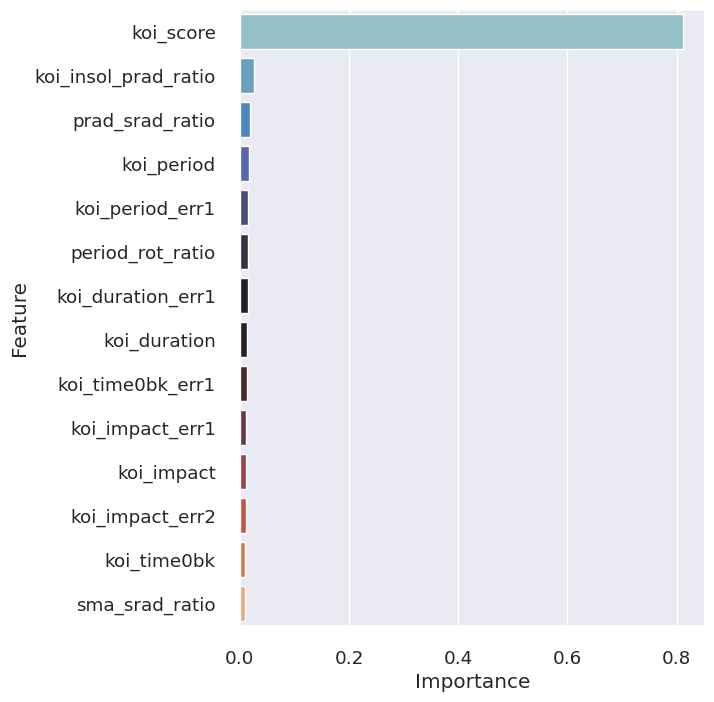

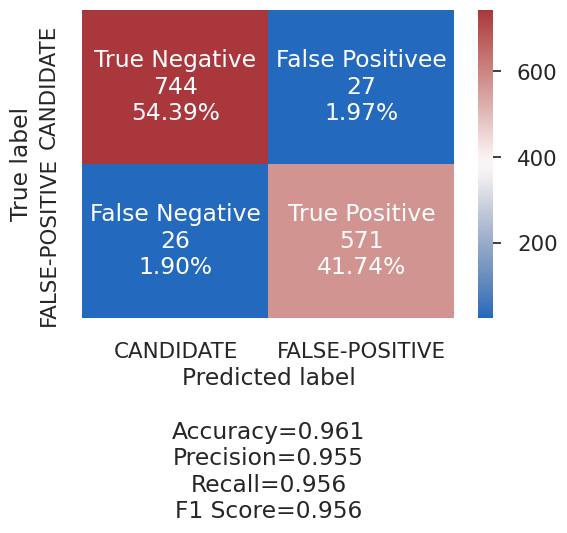

In [47]:
### XGBOOST

preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }


model_args = {
    'n_estimators': 280,  # Number of trees in the ensemble
    'learning_rate': 0.5,  # Step size shrinkage used in boosting
    'max_depth': 80,  # Maximum depth of a tree
    'subsample': 1,  # Subsample ratio of the training instances
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'objective': 'binary:logistic',  # Objective function for binary classification
    'random_state': 42  # Random seed for reproducibility
}


# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(
    preprocess, XGBClassifier, preprocess_args, model_args, boost=True, importance=True)

results['XGBOOST'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)

# Call the validate_model function with the model object
validate_model(model, X_test, y_test)


#### XGBOOST without koi_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded from Google Drive
Initial shape: (7651, 48)
Shape after disposable columns drop: (7651, 37)
Shape after cols with more than 50% nulls drop: (7651, 35)
Shape after dropping rest of nulls: (7187, 35)
Shape after outlier z-score drop: (6268, 35)
Shape after outlier drop: (6083, 35)
Shape after feature derivation: (6083, 39)
Shape after creating categorical features based on numerical features: (6083, 43)
Shape after normalization: (6083, 43)
Final shape: (6083, 17)
Initial shape: (1913, 48)
Shape after disposable columns drop: (1913, 37)
Shape after cols with more than 50% nulls drop: (1913, 35)
Shape after dropping rest of nulls: (1805, 35)
Shape after outlier z-score drop: (1573, 35)
Shape after outlier drop: (1566, 35)
Shape after feature derivation: (1566, 39)
Shape after creating categorical features based on numerical features: (1566, 43)
Sh

'Mean accuracy after cross validation: 0.8324886316481084'


Feature Importance:

Validation Test Results:
Accuracy: 0.7969348659003831, Recall: [0.91531323 0.65198864], Precision: [0.76305609 0.86278195]


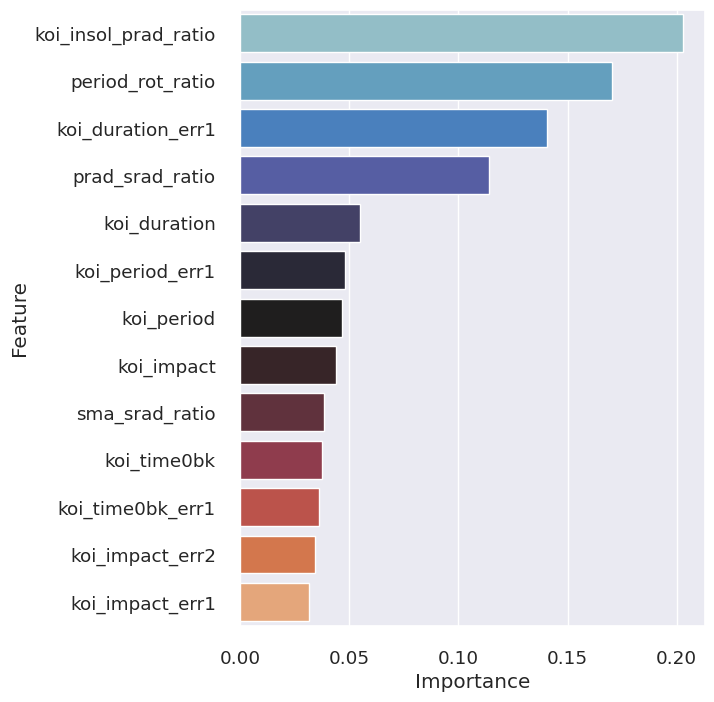

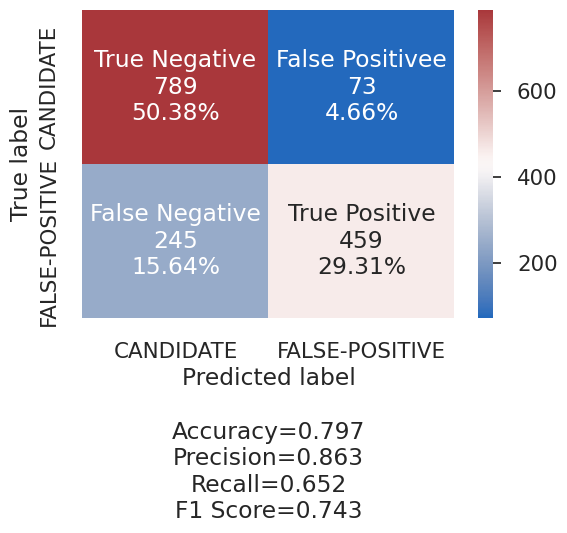

In [48]:
### XGBOOST

preprocess_args = {
    "target_feature": 'koi_pdisposition', 
    "domain_knowledge_disposable_cols": ['koi_score', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_disposition'],
    "ignore_error_cols": True,
    "max_z_score": 4,
    "lof_threshold": 0.5,
    "scaler_class": MinMaxScaler,
    "outlier_class": IsolationForest,
    "pca_dims": 'mle',
    "use_pca": False,
    "display_resulting_df": False,
    "imputer_class": None,
    "imputer_args": {"n_neighbors": 30, "weights": "uniform"},
    "display_resulting_df": False
    }


model_args = {
    'n_estimators': 280,  # Number of trees in the ensemble
    'learning_rate': 0.5,  # Step size shrinkage used in boosting
    'max_depth': 80,  # Maximum depth of a tree
    'subsample': 1,  # Subsample ratio of the training instances
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'objective': 'binary:logistic',  # Objective function for binary classification
    'random_state': 42  # Random seed for reproducibility
}


# Call the run_model function with the provided arguments
X_train, y_train, X_test, y_test, y_pred, scores, model = run_model(
    preprocess, XGBClassifier, preprocess_args, model_args, boost=True, importance=True)

results['XGBOOST_no_koi_score'] = (X_train, y_train, X_test, y_test, y_pred, scores, model)

# Call the validate_model function with the model object
validate_model(model, X_test, y_test)


### Compare Results

#### Comapare Training Cross-Validation

In [49]:
# Define the model names
model_names = ['random_forest', 
               'ml_perceptron',
               'svc',
               'XGBOOST', 'random_forest_no_koi_score', 
               'ml_perceptron_no_koi_score',
               'svc_no_koi_score',
               'XGBOOST_no_koi_score'
               ]

# Compare the models
for model_name in model_names:
    try:
        X_train, y_train, X_test, y_test, y_pred, scores, model = results[model_name]
        class_labels = ['CANDIDATE', 'FALSE POSITIVE']
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, target_names=class_labels)
        print(f"Model: {model_name}")
        print(report)
        print("==============================")
    except KeyError:
        print(f"Results not found for model: {model_name}")
        print("==============================")
    except Exception as e:
        print(f"An error occurred for model: {model_name}")
        print(f"Error message: {str(e)}")
        print("==============================")


Model: random_forest
                precision    recall  f1-score   support

     CANDIDATE       0.98      0.96      0.97       771
FALSE POSITIVE       0.94      0.97      0.96       597

      accuracy                           0.96      1368
     macro avg       0.96      0.96      0.96      1368
  weighted avg       0.96      0.96      0.96      1368

Model: ml_perceptron
                precision    recall  f1-score   support

     CANDIDATE       0.97      0.95      0.96       771
FALSE POSITIVE       0.94      0.96      0.95       597

      accuracy                           0.96      1368
     macro avg       0.95      0.96      0.95      1368
  weighted avg       0.96      0.96      0.96      1368

Model: svc
                precision    recall  f1-score   support

     CANDIDATE       0.97      0.95      0.96       771
FALSE POSITIVE       0.94      0.97      0.95       597

      accuracy                           0.96      1368
     macro avg       0.96      0.96      0.

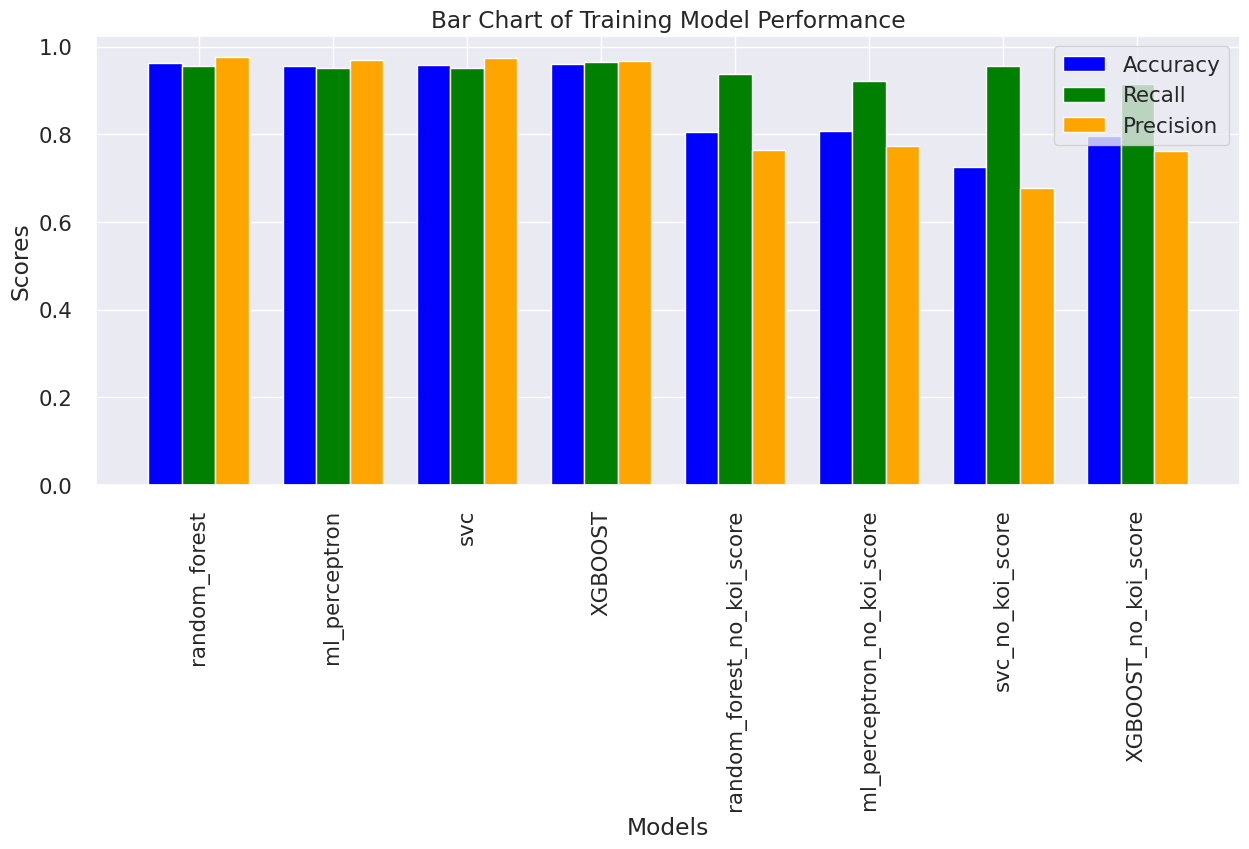

In [50]:
#Plot of Training Cross-Validation

def plot_performance_barplot(models, model_names):
    accuracy_values = []
    recall_values = []
    precision_values = []

    for model_name in model_names:
        try:
            X_train, y_train, X_test, y_test, y_pred, scores, model = results[model_name]
            y_pred = model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
            precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
            
            accuracy_values.append(accuracy)
            recall_values.append(recall[0])  # Assuming 'CANDIDATE' is at index 0
            precision_values.append(precision[0])  # Assuming 'CANDIDATE' is at index 0
        except KeyError:
            print(f"Results not found for model: {model_name}")
        except Exception as e:
            print(f"An error occurred for model: {model_name}")
            print(f"Error message: {str(e)}")

    # Set the width of the bars
    bar_width = 0.25

    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(models))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plot the bars
    plt.bar(r1, accuracy_values, color='blue', width=bar_width, label='Accuracy')
    plt.bar(r2, recall_values, color='green', width=bar_width, label='Recall')
    plt.bar(r3, precision_values, color='orange', width=bar_width, label='Precision')

    # Add xticks and labels
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('Bar Chart of Training Model Performance')
    plt.xticks([r + bar_width for r in range(len(models))], models, rotation='vertical')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function
plot_performance_barplot(model_names, model_names)


#### Compare Test Validation Results

In [51]:
# # Define the model names
model_names = ['random_forest', 'random_forest_no_koi_score', 
               'ml_perceptron', 'ml_perceptron_no_koi_score',
               'svc', 'svc_no_koi_score',
               'XGBOOST', 'XGBOOST_no_koi_score']

# Define an empty list to store the results
results_list = []

# Loop through the models and add the results to the list
for model_name in model_names:
    try:
        X_train, y_train, X_test, y_test, y_pred, scores, model = results[model_name]
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
        precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
        results_list.append([model_name, accuracy, recall, precision])
    except KeyError:
        print(f"Results not found for model: {model_name}")
        print("==============================")
    except Exception as e:
        print(f"An error occurred for model: {model_name}")
        print(f"Error message: {str(e)}")
        print("==============================")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list, columns=["Model", "Accuracy", "Recall", "Precision"])

# Display the results table
print("Results Test Table:")
print(tabulate(results_df, headers='keys', tablefmt='psql'))



Results Test Table:
+----+----------------------------+------------+-------------------------+-------------------------+
|    | Model                      |   Accuracy | Recall                  | Precision               |
|----+----------------------------+------------+-------------------------+-------------------------|
|  0 | random_forest              |   0.961988 | [0.95590143 0.96984925] | [0.97615894 0.94453507] |
|  1 | random_forest_no_koi_score |   0.805875 | [0.93735499 0.64488636] | [0.7637051  0.89370079] |
|  2 | ml_perceptron              |   0.955409 | [0.95071336 0.96147404] | [0.96957672 0.9379085 ] |
|  3 | ml_perceptron_no_koi_score |   0.807152 | [0.92111369 0.66761364] | [0.77237354 0.87360595] |
|  4 | svc                        |   0.958333 | [0.95201038 0.96649916] | [0.9734748  0.93973941] |
|  5 | svc_no_koi_score           |   0.726692 | [0.95591647 0.44602273] | [0.67874794 0.89204545] |
|  6 | XGBOOST                    |   0.961257 | [0.96498054 0.95644891